In [36]:
# Step 1: Define the target variable
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
# Load the dataset
df = pd.read_csv('songs_normalize.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [38]:
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [39]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [40]:
# Check for missing values
print(df.isnull().sum())

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [41]:
# Define the target variable 'hit' based on popularity
df['hit'] = (df['popularity'] >= 70).astype(int)  # Adjust the threshold as needed


In [42]:
# Select relevant features for the model
X = df[['popularity', 'energy', 'danceability', 'valence', 'loudness', 'tempo', 'duration_ms', 'acousticness']]
y = df['hit']



print("X values",X)

print("Y values",y)


X values       popularity  energy  danceability  valence  loudness    tempo  \
0             77   0.834         0.751    0.894    -5.444   95.053   
1             79   0.897         0.434    0.684    -4.918  148.726   
2             66   0.496         0.529    0.278    -9.007  136.859   
3             78   0.913         0.551    0.544    -4.063  119.992   
4             65   0.928         0.614    0.879    -4.806  172.656   
...          ...     ...           ...      ...       ...      ...   
1995          79   0.734         0.842    0.952    -5.065  137.958   
1996          78   0.702         0.552    0.564    -5.707  169.994   
1997          69   0.678         0.847    0.811    -8.635   97.984   
1998          75   0.520         0.741    0.347    -7.513  102.998   
1999          85   0.762         0.695    0.553    -3.497  120.042   

      duration_ms  acousticness  
0          211160        0.3000  
1          167066        0.0103  
2          250546        0.1730  
3          224

In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Initialize the logistic regression model
model = LogisticRegression(C=1.0, solver='liblinear')

In [46]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [1.       0.98125  0.990625 1.       0.99375 ]
Mean CV score: 0.99


In [47]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [48]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [49]:

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99


In [50]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[247   2]
 [  0 151]]


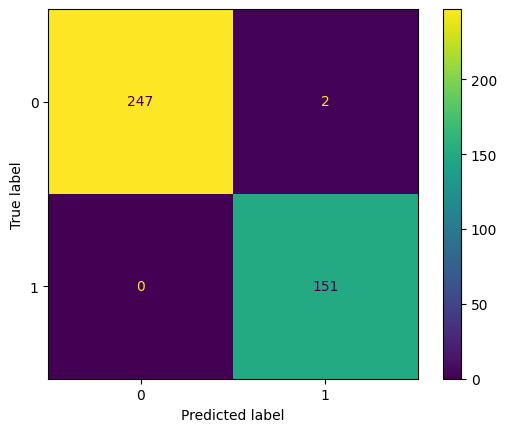

In [52]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


In [55]:
# Import joblib to save the model
import joblib

# Save the trained model
joblib.dump(model, 'spotify_model.pkl')  # You can specify a different path if needed

print("Model saved successfully!")

Model saved successfully!


In [56]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,hit
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,1
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",1
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",1
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,0


In [64]:


def hit_songs(df):
    # Filter the DataFrame for hit songs
    hit_df = df[df['hit'] == 1]
    
    # Check if there are any hit songs
    if not hit_df.empty:
        return hit_df[['song', 'artist']]  # Return the relevant columns
    else:
        return "No hit songs found."

# Assuming df is your DataFrame containing the song data
print("hit songs are",hit_songs(df).head())





hit songs are                      song           artist
0  Oops!...I Did It Again   Britney Spears
1    All The Small Things        blink-182
3            It's My Life         Bon Jovi
6     The Real Slim Shady           Eminem
8             Say My Name  Destiny's Child
